In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import yaml

import cartopy.crs as ccrs

# Windage 0.0


In [2]:
m = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/small-grid/mldp-winds0.0//output/ciops-e_ml_2022022400_P2D.nc'
meuler='/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/small-grid/mldp-winds0.0-euler/output/ciops-e_ml_2022022400_P2D.nc'
o = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/small-grid/opendrift-wind0.0/output/ciops-e_od_2022022400_P2D.nc'
opre = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/small-grid/opendrift-preprocess/output/ciops-e_od_2022022400_P2D.nc'

In [3]:
dm = xr.open_dataset(m)
dmeuler=xr.open_dataset(meuler)
do = xr.open_dataset(o)
dopre = xr.open_dataset(opre)

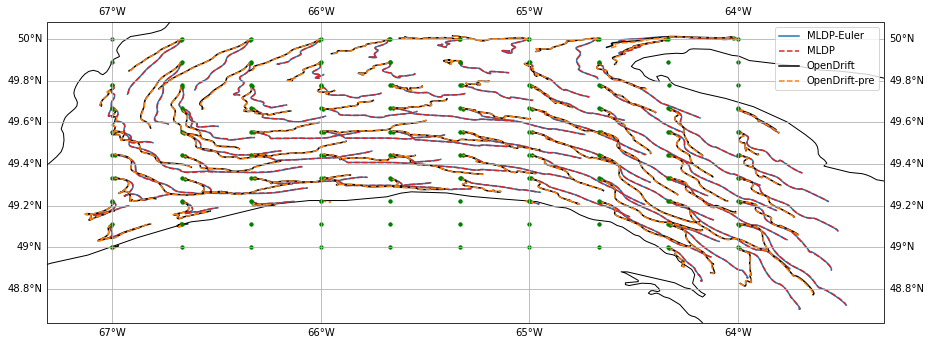

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
for d, color, l in zip([dmeuler, dm,  do, dopre], ['C0', 'C3--', 'k', 'C1--'], ['MLDP-Euler', 'MLDP', 'OpenDrift', 'OpenDrift-pre']):
    count=0
    for m in d.model_run.values:
        dsel = d.sel(model_run=m)
        label=l if count==0 else '__no-label__'
        ax.plot(dsel.mod_lon, dsel.mod_lat, color,label=label, transform=ccrs.PlateCarree())
        ax.plot(dsel.mod_lon[0], dsel.mod_lat[0], '.g',label='__nolabel',  transform=ccrs.PlateCarree())
        count+=1
ax.legend()
ax.coastlines()
g=ax.gridlines(draw_labels=True)

In [8]:
fig.savefig('MDLPvsOpenDrift.png')